# **Definição do problema**

## - Base de dados

*   Input(X): Temperatura
*   Outpout(Y): Lucro diário em dólares

# **Etapa 1 - Importação das bibliotecas**

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.8.0'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Etapa 2 - Importação da base de dados**

In [4]:
dados_df = pd.read_csv('/content/SalesData.csv')
dados_df.reset_index(drop = True, inplace = True)

In [5]:
dados_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [6]:
dados_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [7]:
dados_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352519
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [8]:
dados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [9]:
dados_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# **Etapa 3 - Visualização da base de dados**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


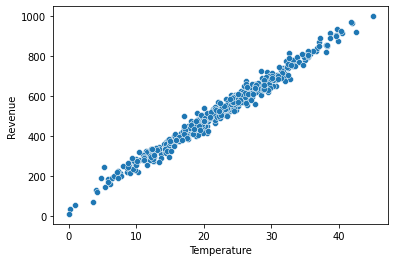

In [10]:
sns.scatterplot(dados_df['Temperature'], dados_df['Revenue']);

# **Etapa 4 - Criação das variáveis da base de dados**

In [11]:
X_train = dados_df['Temperature']
y_train = dados_df['Revenue']

In [12]:
X_train.shape, X_train

((500,), 0      24.566884
 1      26.005191
 2      27.790554
 3      20.595335
 4      11.503498
          ...    
 495    22.274899
 496    32.893092
 497    12.588157
 498    22.362402
 499    28.957736
 Name: Temperature, Length: 500, dtype: float64)

In [13]:
y_train.shape, y_train

((500,), 0      534.799028
 1      625.190122
 2      660.632289
 3      487.706960
 4      316.240194
           ...    
 495    524.746364
 496    755.818399
 497    306.090719
 498    566.217304
 499    655.660388
 Name: Revenue, Length: 500, dtype: float64)

# **Etapa 5 - Criação e construção do modelo**

In [17]:
model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(units = 1, input_shape = [1]))    #uma saída, que é o lucro (input_shape = [1]), para um atributo de entrada (units = 1) que é a temperatura
model.add(tf.keras.layers.Dense(units = 10, input_shape = [1]))    #o erro está alto, entao colocaremos mais camadas (neuronios) na rede para tentar diminuir o erro com as epocas
                                                                  #Faremos isso para tentar resolver esse problema, que apesar de ser resolvido com uma regressão linear (disposição
                                                                  #das amostras), ele não consegue ajustar com apenas um neuronio (1 camada oculta), sendo necessário a acresção de 
                                                                  #mais neuronios (mais camadas ocultas)
model.add(tf.keras.layers.Dense(units = 1))                       
#as duas linhas acima indicam 10 neuronios na camada oculta, 1 neuronio na camada de entrada, e 1 neuronio na camada de saida.                                        

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                20        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Total params nos retorna o valor 31, que é a quantidade de pesos obtidos pela rede neural criada**

In [19]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [20]:
epochs_hist = model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
16/16 [==============================] - 0s 2ms/step - loss: 137849.1875
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 14048.4043
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 4243.9067
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 1504.3092
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 833.9846
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 732.0997
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 702.8948
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 694.3812
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 689.5355
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 680.5339
Epoch 11/1000
16/16 [==============================] - 0s 2ms/step - loss: 674.8489
Epoch 12/1000
16/16 [==============================] - 0s 2ms/step - loss: 695

# **Etapa 6 - Avaliação do modelo**

In [22]:
epochs_hist.history.keys()

dict_keys(['loss'])

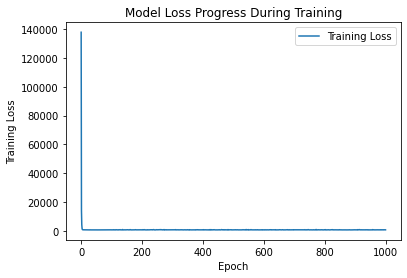

In [23]:
plt.plot(epochs_hist.history['loss']);
plt.title('Model Loss Progress During Training');
plt.xlabel('Epoch');
plt.ylabel('Training Loss');
plt.legend(['Training Loss']);

In [24]:
model.get_weights()

[array([[-5.80919720e-03, -1.57917123e-02,  2.70615406e-02,
         -3.81465914e-04, -3.45635321e-03, -7.42491148e-03,
          1.65557575e+00, -6.84679449e-02, -4.20244408e+00,
          1.18881725e-02]], dtype=float32),
 array([ 0.28425834,  0.41537255,  0.04440954,  0.01507026,  0.36822522,
         0.27799976,  3.776212  ,  2.0650465 , -6.130694  , -0.5520356 ],
       dtype=float32),
 array([[ 1.8757065e-03],
        [ 9.1498671e-03],
        [-1.2554887e-02],
        [ 4.4482826e-05],
        [ 8.0403946e-03],
        [ 8.6735394e-03],
        [ 1.7309335e+00],
        [ 1.5451161e-02],
        [-4.2920160e+00],
        [-1.8149570e-02]], dtype=float32),
 array([11.336976], dtype=float32)]

**Previsões com o modelo treinado**

In [31]:
temp = 5
revenue = model.predict([temp])
print("Renevue Predictions Using Trained ANN = ",revenue[0])

Renevue Predictions Using Trained ANN =  [148.7414]


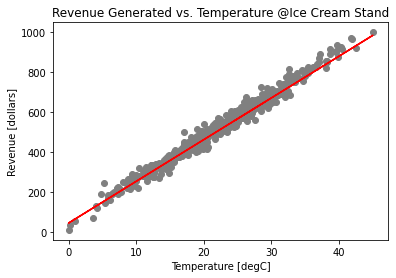

In [34]:
plt.scatter(X_train, y_train, color = 'gray');
plt.plot(X_train, model.predict(X_train), color = 'red');
plt.ylabel('Revenue [dollars]');
plt.xlabel('Temperature [degC]');
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');

# **Etapa 7 - Confirmar os resultados usando o sklearn**

In [35]:
X_train.shape

(500,)

In [ ]:
X_train = X_train.values.reshape(-1,1)
#quando usamos o .values, estamos acessando os valores no formato do numpy array, e colocando em formato de matriz com o reshape
#o sklearn só trabalha com matriz

In [47]:
X_train.shape

(500, 1)

In [48]:
y_train = y_train.values.reshape(-1,1)

In [49]:
y_train.shape

(500, 1)

In [50]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [51]:
regressor.coef_

array([[21.44362551]])

In [52]:
regressor.intercept_

array([44.83126709])

**os valores regressor.coef_ e regressor.intercept_ são os valores encontrados com a rede neural, que formam a equação da reta que se ajusta aos pontos, valores esses obtidos pela rede neural com 31 pesos**

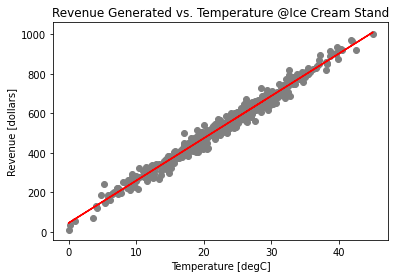

In [53]:
plt.scatter(X_train, y_train, color = 'gray');
plt.plot(X_train, regressor.predict(X_train), color = 'red');
plt.ylabel('Revenue [dollars]');
plt.xlabel('Temperature [degC]');
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');

**Previsões com o modelo treinado**

In [56]:
temp = 5
revenue = regressor.predict([[temp]])       #como foi realizada a transformação para o formato de matriz, precisamos colocar o temp entre dois cochetes
print("Renevue Predictions Using Trained ANN = ",revenue[0])

Renevue Predictions Using Trained ANN =  [152.04939464]


**Assim comparamos os resultados obtidos pelo modelo treinado por uma rede neural com 10 neuronios na camada oculta, e o resultado obtido por uma regressão linear, para estimativa do lucro da venda de sorvetes com relação a temperatura.**